In [1]:
import pandas as pd
df = pd.read_csv('dulieuxettuyendaihoc.csv',
                 header=0,delimiter=',',encoding='utf-8')

df.rename(columns={'NGAYTHI':'NT',
                   'DINHHUONGNGHENGHIEP':'NGHE'}, 
                   inplace=True)
df

,MSSV,GT,DT,KV,M1,M2,M3,KT,NT,NGHE
0,SV001,F,NaN,2NT,3.25,3.25,4.50,A1,12/7/2018,No
1,SV002,M,NaN,1,6.00,4.00,3.50,C,12/7/2018,Yes
2,SV003,M,NaN,1,5.00,6.75,4.00,C,12/7/2018,No
3,SV004,M,NaN,1,4.25,4.25,5.25,D1,12/7/2018,No
4,SV005,M,NaN,2NT,4.25,4.50,5.00,A,12/7/2018,No
...,...,...,...,...,...,...,...,...,...,...
95,SV0096,F,NaN,1,5.25,1.50,6.25,C,7/20/2022,Yes
96,SV0097,F,NaN,1,5.25,3.75,4.75,C,7/20/2022,No
97,SV0098,M,NaN,2NT,7.00,8.00,4.00,C,7/20/2022,Yes
98,SV0099,M,NaN,1,5.00,3.50,5.50,C,7/20/2022,No


In [2]:
dfKhoiC = df.loc[df['KT'] == 'C']
dfKhoiC['M1']

1     6.00
2     5.00
6     6.50
22    5.00
23    6.75
24    7.00
25    4.75
26    5.25
27    5.25
95    5.25
96    5.25
97    7.00
98    5.00
99    5.25
Name: M1, dtype: float64

In [3]:
dfKhoiC['M1'].describe()

count    14.000000
mean      5.660714
std       0.812209
min       4.750000
25%       5.062500
50%       5.250000
75%       6.375000
max       7.000000
Name: M1, dtype: float64

In [4]:
import scipy.stats as stats

stats.ttest_1samp(dfKhoiC['M1'], popmean=4.0)


TtestResult(statistic=np.float64(7.650519779016341), pvalue=np.float64(3.6339826927369557e-06), df=np.int64(13))

In [5]:
dfKhoiC = df.loc[df['KT'] == 'C']
stats.ttest_ind(dfKhoiC['M1'], dfKhoiC['M2'], equal_var=True)


TtestResult(statistic=np.float64(2.5331368604654054), pvalue=np.float64(0.017676922552296807), df=np.float64(26.0))

In [6]:
from statsmodels.stats.weightstats import ztest as ztest

In [7]:
ztest(df['M1'], value=8.0)


(np.float64(-29.907152266677993), np.float64(1.588509177330612e-196))

In [8]:
ztest(df['M1'], df['M2'], value=0)

(np.float64(-2.9004757923795), np.float64(0.0037259661678783573))

In [9]:
# r<0: x,y nghich
# r=0; x,y khong tuong quan
# r>0: x,y thuan
# H0.rxy = 0
# r = 0 la khong tuong quan
# Cau 5: kiem tra M1 va M2 co tuong quan khong
from scipy.stats.stats import pearsonr

pearsonr(df['M1'], df['M2'])
#khong du du kien de noi rang M1 va M2 co tuong quan voi a = 5%

C:\Users\DELL\AppData\Local\Temp\ipykernel_19408\497925498.py:7: DeprecationWarning: Please import `pearsonr` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.stats.stats import pearsonr


PearsonRResult(statistic=np.float64(0.03515405725785023), pvalue=np.float64(0.7284198928723625))

In [10]:
pearsonr(df['M2'], df['M3'])

PearsonRResult(statistic=np.float64(-0.09152288755408225), pvalue=np.float64(0.3651344767496172))

In [11]:
# kiem dinh Fishen dung de kiem dinh 2 bien dinh tinh gia tri nhi phan co doc lap hay khong(Không phụ thuộc)(không liên quan)
import scipy.stats as stats
# có sự phụ thuộc nào giữa việc định hướng nghề nghiêp và giới tính hay không
crosdata = pd.crosstab(df['GT'], [df['NGHE']], rownames=['GT'], colnames=['NGHE'])
crosdata

NGHE,No,Yes
GT,,
F,23,25
M,32,20


In [12]:
odd_ratio, p_value = stats.fisher_exact(crosdata)
print('odd ratio is : ' + str(odd_ratio))
print('p_value is : ' + str(p_value))
#chấp nhận Ho vì p_value =0.2276 >alpha =0.05
# không đủ dữ kiện để nói rằng DHNN có liên quan đến giới tính

odd ratio is : 0.575
p_value is : 0.22763927303454412


In [13]:
# kiem tra sự độc lập của 2 biến định tính
from scipy.stats import chi2_contingency
# Ho = KT khong phu thuộc vào khu vực
crosdata = pd.crosstab(df['KV'], [df['KT']], rownames=['KV'], colnames=['KT'])
crosdata

KT,A,A1,B,C,D1
KV,,,,,
1,29,2,8,8,13
2,9,0,0,2,8
2NT,11,4,1,4,1


In [14]:
stat, p, dof, expected = chi2_contingency(crosdata)
 
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

# Không đủ dữ kiện để nói rằng KT không phụ thuộc vào khu vực(reject H0) p<alpha

p value is 0.02012461887796485
Dependent (reject H0)


In [15]:
crosdata = pd.crosstab(df['GT'], [df['KT']], rownames=['GT'], colnames=['KT'])
crosdata
stat, p, dof, expected = chi2_contingency(crosdata)
 
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 0.005044752209452435
Dependent (reject H0)


In [16]:
# One way Anova
# dùng để kiểm định TB trên từng nhóm có bằng nhau hay không
# H0 = Ynhom1 = ynhom2 = ynhomn
# Ho : yM1/F = yM1/M
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Mô Hình Hồi Quy Tuyến Tính: Được tạo bằng ols('M1 ~ GT', data=df).fit(), với M1 là biến phụ thuộc và GT là biến độc lập.
# Phân Tích Phương Sai (ANOVA): Được thực hiện bằng sm.stats.anova_lm(model, typ=1), cung cấp thông tin về sự biến động giữa các nhóm và trong nhóm.
model = ols('M1 ~ GT', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=1)
aov_table
# Không dủ ... Điểm M1 phụ thuộc vào giới tính
# M1 không phụ thuộc vào giới tính

,df,sum_sq,mean_sq,F,PR(>F)
GT,1.0,1.203141,1.203141,0.590538,0.444059
Residual,98.0,199.661859,2.037366,NaN,NaN


In [17]:
model = ols('M3 ~ KT', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=1)
aov_table
# Không dủ ... Điểm M2 phụ thuộc vào KV
# M1 không phụ thuộc vào giới tính

,df,sum_sq,mean_sq,F,PR(>F)
KT,4.0,3.967636,0.991909,0.911814,0.46041
Residual,95.0,103.344864,1.087841,NaN,NaN


In [18]:
# Two way Anova
model = ols('M1 ~ GT + KV + GT:KV',data=df).fit()
result = sm.stats.anova_lm(model, type=2)
print(result)


            df      sum_sq   mean_sq         F    PR(>F)
GT         1.0    1.203141  1.203141  0.598960  0.440917
KV         2.0    3.493206  1.746603  0.869512  0.422500
GT:KV      2.0    7.349290  3.674645  1.829350  0.166186
Residual  94.0  188.819363  2.008717       NaN       NaN


In [19]:
model = ols('M2 ~ KV + KT + KV:KT',data=df).fit()
result = sm.stats.anova_lm(model, type=2)
print(result)


            df     sum_sq   mean_sq         F    PR(>F)
KV         2.0   6.053398  3.026699  2.987203  0.055626
KT         4.0  10.061984  2.515496  2.482671  0.049539
KV:KT      8.0   8.688324  1.086040  1.071869  0.390293
Residual  87.0  88.150282  1.013222       NaN       NaN


In [20]:
# Phan tích sự ảnh hưởng của M1 và M3
# M3 = f(M1)
# M3: biến số phụ thuộc
# M1: biến độc lập
# f: mô hình hồi quy tuyến tính
import statsmodels.api as sm
X_with_constant = sm.add_constant(df[["M1"]].values)
y = df[['M3']].values
result = sm.OLS(y, X_with_constant).fit()
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                   0.03439
Date:                Tue, 26 Nov 2024   Prob (F-statistic):              0.853
Time:                        23:20:49   Log-Likelihood:                -145.41
No. Observations:                 100   AIC:                             294.8
Df Residuals:                      98   BIC:                             300.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8238      0.295     16.338      0.0

In [21]:
m3 = 4.8238 + 0.0137*6.7
m3

4.91559

In [22]:
X_with_constant = sm.add_constant(df[["M2"]].values)
y = df[['M3']].values
result = sm.OLS(y, X_with_constant).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.8278
Date:                Tue, 26 Nov 2024   Prob (F-statistic):              0.365
Time:                        23:20:49   Log-Likelihood:                -145.00
No. Observations:                 100   AIC:                             294.0
Df Residuals:                      98   BIC:                             299.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2575      0.433     12.139      0.0

In [23]:
m3 = 5.2575 - 0.0899*5.7
m3

4.74507

In [24]:
# sự ảnh hưởng của M1, M2 -> M3 
X_with_constant = sm.add_constant(df[["M1","M2"]].values)
y = df[['M3']].values
result = sm.OLS(y, X_with_constant).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.012
Method:                 Least Squares   F-statistic:                    0.4335
Date:                Tue, 26 Nov 2024   Prob (F-statistic):              0.649
Time:                        23:20:49   Log-Likelihood:                -144.98
No. Observations:                 100   AIC:                             296.0
Df Residuals:                      97   BIC:                             303.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2006      0.508     10.241      0.0

In [25]:
X = df[["M1","M2"]].values
y = df[['M3']].values
result = sm.OLS(y, X).fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.911
Model:                            OLS   Adj. R-squared (uncentered):              0.909
Method:                 Least Squares   F-statistic:                              500.8
Date:                Tue, 26 Nov 2024   Prob (F-statistic):                    3.54e-52
Time:                        23:20:49   Log-Likelihood:                         -181.63
No. Observations:                 100   AIC:                                      367.3
Df Residuals:                      98   BIC:                                      372.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

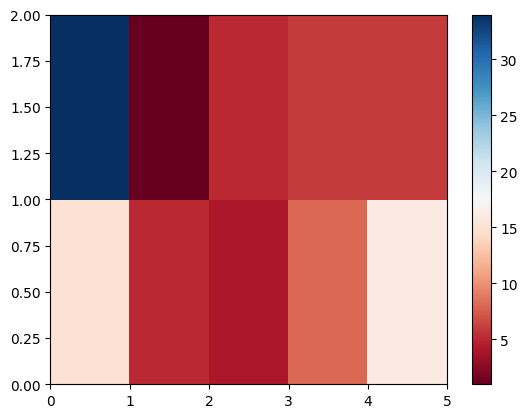

In [26]:
import matplotlib.pyplot as plt
plt.pcolor(crosdata,cmap='RdBu')
plt.colorbar()
plt.show()